In [1]:
from aerobot.plot import plot_training_curve
import os
from aerobot.io import load_results_dict, RESULTS_PATH

# SI Figure 1

The first supplementary figure consists of two panels.

- Panel A: The phylogenetic composition of the training and validation datasets at the phylum level. Each phylum is represented by a split bar, where each portion of the bar represents the number of entries in the training or validation dataset belonging to that phylum.
- Panel B: The labels of entries in the training and validation datasets, i.e. aerobe, anaerobe, or facultative. This should also be represented as a stacked bar plot. 


In [2]:
results = load_results_dict(os.path.join(RESULTS_PATH, 'train_nonlinear_aa_3mer_ternary.json'))

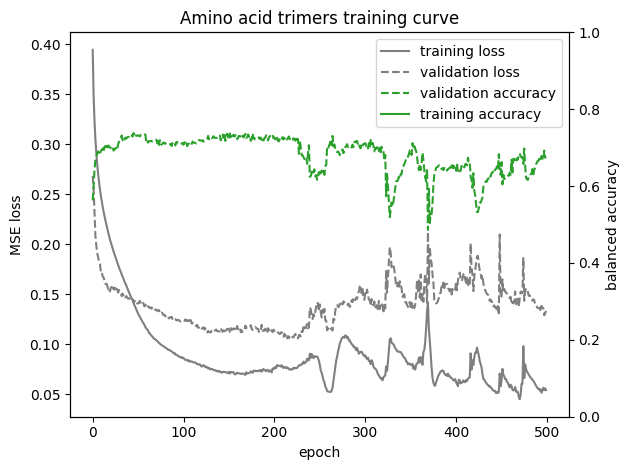

In [3]:
plot_training_curve(results)